<a href="https://colab.research.google.com/github/Afshan300/OASISINFOBYTE/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving archive (7).zip to archive (7).zip


In [ ]:
import zipfile
import ioA
import os

zip_filename = "archive (7).zip"  # your uploaded filename
extract_folder = "sales_data"     # folder name for extraction

# Create folder if not exists
os.makedirs(extract_folder, exist_ok=True)

# Extract ZIP
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✔ Extracted Files:")
for root, dirs, files in os.walk(extract_folder):
    for f in files:
        print(os.path.join(root, f))


✔ Extracted Files:
sales_data/Advertising.csv


In [ ]:
import pandas as pd
csv_path = "sales_data/Advertising.csv"  # CHANGE if different name appears
df = pd.read_csv(csv_path)

print("✔ Data Loaded Successfully!")
print(df.head())
print(df.columns)


✔ Data Loaded Successfully!
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [ ]:
print("\nShape of data (rows, columns):", df.shape)
print("\nAny missing values? 👇")
print(df.isnull().sum())



Shape of data (rows, columns): (200, 5)

Any missing values? 👇
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [ ]:
# Features (inputs)
X = df[['TV', 'Radio', 'Newspaper']]

# Target (output)
y = df['Sales']

print("Input features (X):", X.columns.tolist())
print("Target (y): Sales")


Input features (X): ['TV', 'Radio', 'Newspaper']
Target (y): Sales


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 160
Testing samples: 40


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully ✅")
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2, b3):", model.coef_)


Model trained successfully ✅
Intercept (b0): 2.979067338122629
Coefficients (b1, b2, b3): [0.04472952 0.18919505 0.00276111]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance 📊")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f} (closer to 1 = better)")


Model Performance 📊
Mean Squared Error (MSE): 3.17
R² Score: 0.899 (closer to 1 = better)


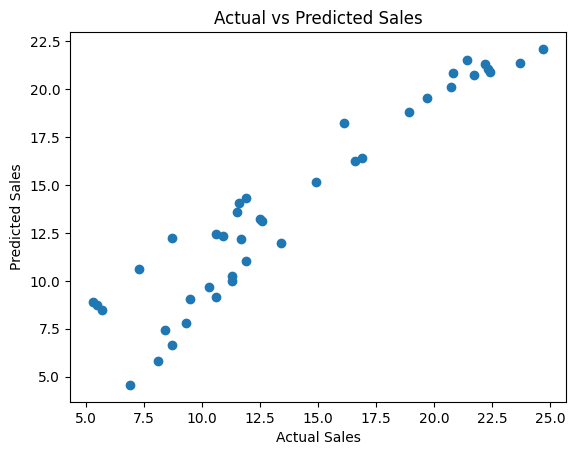

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


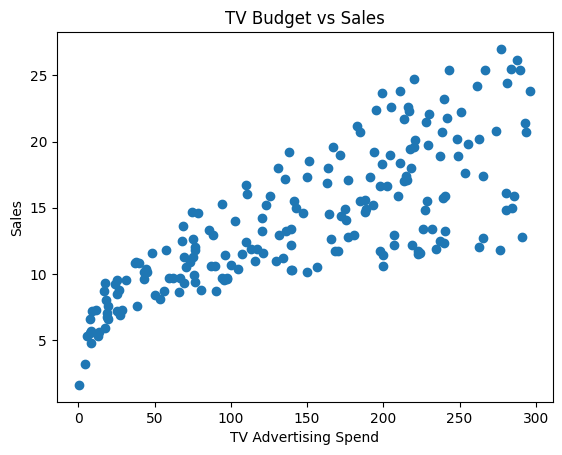

In [ ]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("TV Budget vs Sales")
plt.show()


In [ ]:
print("Enter advertising budget to predict sales:")

tv = float(input("TV budget: "))
radio = float(input("Radio budget: "))
news = float(input("Newspaper budget: "))

input_data = [[tv, radio, news]]
pred_sales = model.predict(input_data)[0]

print(f"\n📌 Predicted Sales = {pred_sales:.2f} units")


Enter advertising budget to predict sales:
TV budget: 20000
Radio budget: 3000
Newspaper budget: 100

📌 Predicted Sales = 1465.43 units


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
